In [187]:
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd
import spacy
from imblearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

In [152]:
main_direct = '../resources/micro_proyecto2_data/data_ods.xlsx'
nlp = spacy.load("es_core_news_md")

In [153]:
df = pd.read_excel(main_direct)
print(df.shape)
columna = 'ODS'
conteo = df[columna].value_counts().to_frame(name="Cantidad").reset_index()
conteo = conteo.rename(columns={"index": columna})
print (conteo.sort_values(by = columna, ascending=True))
df.head(5)

(9556, 2)
    ODS  Cantidad
7     1       502
11    2       366
3     3       887
2     4      1011
1     5      1058
5     6       687
4     7       781
9     8       442
13    9       342
12   10       352
6    11       594
15   12       312
8    13       456
10   14       374
14   15       324
0    16      1068


,textos,ODS
0,La Sección 3 investiga estrategias para promov...,4
1,"En caso contrario, la respuesta se considera f...",11
2,Las personas con entre siete y nueve años de e...,1
3,"En los últimos años, diferentes países de Asia...",10
4,"En otros casos, las normas generalizadas que v...",5


In [154]:
class PreprocessText(BaseEstimator, TransformerMixin):
    def fit (self, X, y = None):
        return self
    def transform(self, X):
        return [self.preprocess_text(text) for text in X]
    def preprocess_text(self, text):
        doc = nlp(str(text).lower())
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        return " ".join(tokens)

In [155]:
smote_balancer = SMOTE(sampling_strategy = "not majority", random_state = 42 )
text_pipeline_smote = Pipeline([
    ("preprocessor", PreprocessText()),
    ("vectorizer", TfidfVectorizer()),
    ("balancer", smote_balancer),
    ("classifier", LinearSVC())
])

text_pipeline_class_weight = Pipeline([
    ("preprocessor", PreprocessText()),
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LinearSVC(class_weight="balanced"))
])

text_pipeline_base = Pipeline([
    ("preprocessor", PreprocessText()),
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LinearSVC())
])

In [156]:
x_texts = df["textos"].astype(str)
y_ods = df["ODS"]

X_train, X_test, y_train, y_test= train_test_split(x_texts, y_ods, test_size = 0.2, random_state = 42 )

text_pipeline_smote.fit(X_train, y_train)
text_pipeline_class_weight.fit(X_train, y_train)
text_pipeline_base.fit(X_train, y_train)
print("modelos entrenados correctamente")

modelos entrenados correctamente


In [157]:
text_pipeline_smote.steps.pop(2)
print(text_pipeline_smote.steps)

[('preprocessor', PreprocessText()), ('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())]


In [158]:

y_pred_smote = text_pipeline_smote.predict(X_test)
y_pred_class_weight = text_pipeline_class_weight.predict(X_test)
y_pred_base = text_pipeline_base.predict(X_test)

In [177]:
print("Accuracy SMOTE: ", accuracy_score(y_test, y_pred_smote))
print("Clasification Report SMOTE:\n", classification_report(y_test, y_pred_smote))

Accuracy SMOTE:  0.8943514644351465
Clasification Report SMOTE:
               precision    recall  f1-score   support

           1       0.83      0.85      0.84       106
           2       0.84      0.90      0.87        70
           3       0.91      0.94      0.92       176
           4       0.95      0.95      0.95       203
           5       0.91      0.93      0.92       216
           6       0.95      0.93      0.94       147
           7       0.90      0.91      0.91       170
           8       0.73      0.64      0.68        94
           9       0.74      0.78      0.76        54
          10       0.84      0.74      0.79        80
          11       0.88      0.90      0.89       116
          12       0.81      0.86      0.84        59
          13       0.89      0.82      0.86        83
          14       0.98      0.94      0.96        67
          15       0.88      0.96      0.92        69
          16       0.96      0.96      0.96       202

    accuracy   

In [169]:
print("Accuracy Class Weight: ", accuracy_score(y_test, y_pred_class_weight))
print("Clasification Report Class Weight:\n", classification_report(y_test, y_pred_class_weight))

Accuracy Class Weight:  0.8901673640167364
Clasification Report Class Weight:
               precision    recall  f1-score   support

           1       0.82      0.86      0.84       106
           2       0.82      0.89      0.85        70
           3       0.93      0.94      0.93       176
           4       0.95      0.94      0.94       203
           5       0.92      0.93      0.92       216
           6       0.95      0.92      0.93       147
           7       0.90      0.91      0.90       170
           8       0.68      0.64      0.66        94
           9       0.70      0.80      0.75        54
          10       0.85      0.71      0.78        80
          11       0.89      0.90      0.89       116
          12       0.79      0.85      0.82        59
          13       0.87      0.82      0.84        83
          14       0.98      0.94      0.96        67
          15       0.88      0.94      0.91        69
          16       0.96      0.96      0.96       202

 

In [170]:
print("Accuracy Base: ", accuracy_score(y_test, y_pred_base))
print("Clasification Report Base:\n", classification_report(y_test, y_pred_base))

Accuracy Base:  0.8943514644351465
Clasification Report Base:
               precision    recall  f1-score   support

           1       0.82      0.88      0.85       106
           2       0.86      0.89      0.87        70
           3       0.91      0.93      0.92       176
           4       0.95      0.95      0.95       203
           5       0.91      0.94      0.92       216
           6       0.95      0.93      0.94       147
           7       0.90      0.93      0.91       170
           8       0.70      0.63      0.66        94
           9       0.76      0.78      0.77        54
          10       0.88      0.70      0.78        80
          11       0.87      0.90      0.88       116
          12       0.83      0.85      0.84        59
          13       0.89      0.82      0.86        83
          14       0.98      0.94      0.96        67
          15       0.88      0.94      0.91        69
          16       0.96      0.97      0.96       202

    accuracy     

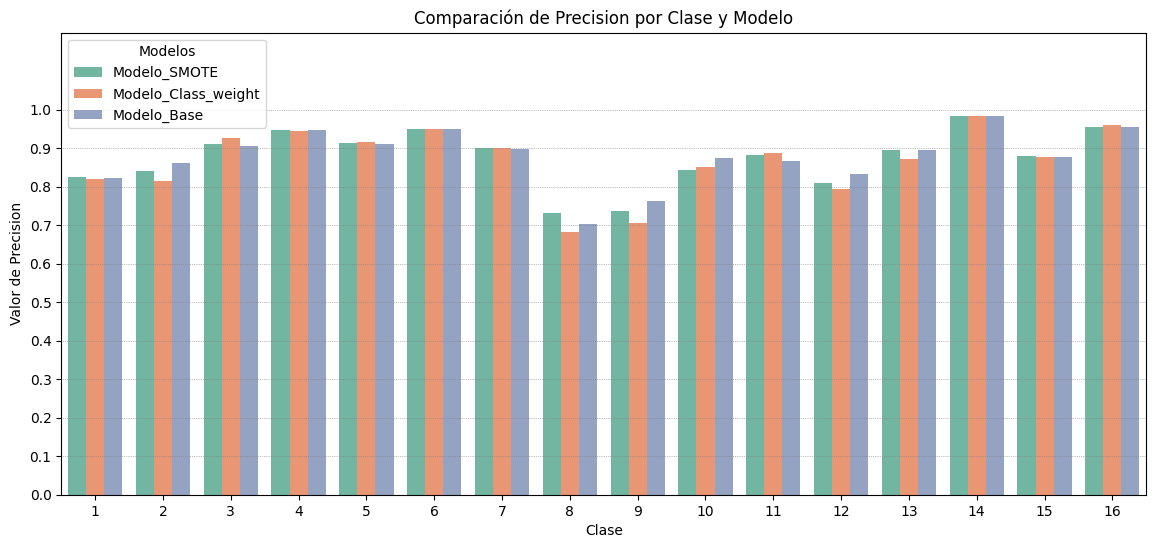

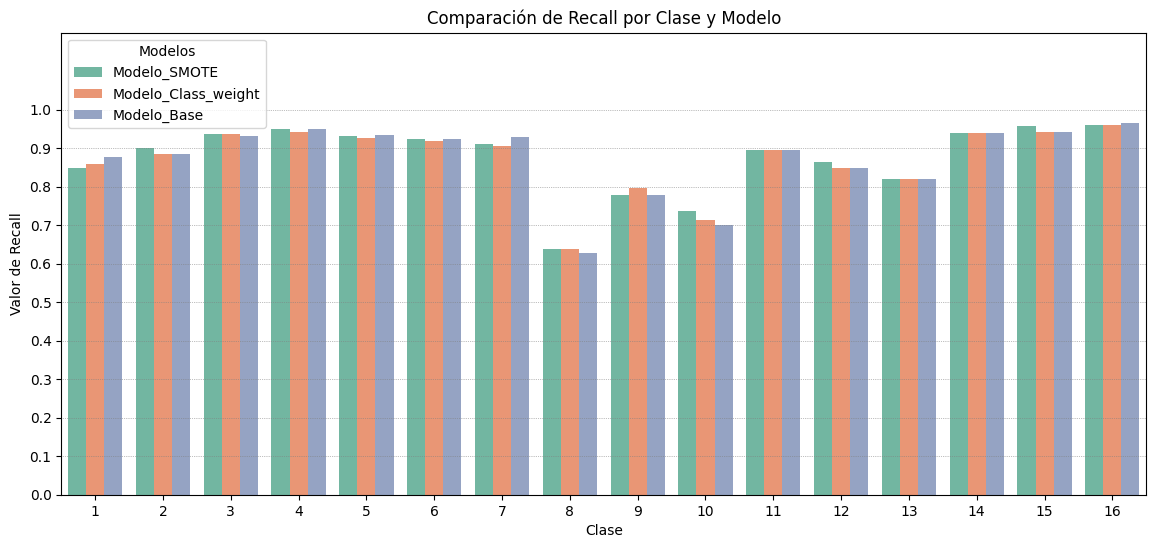

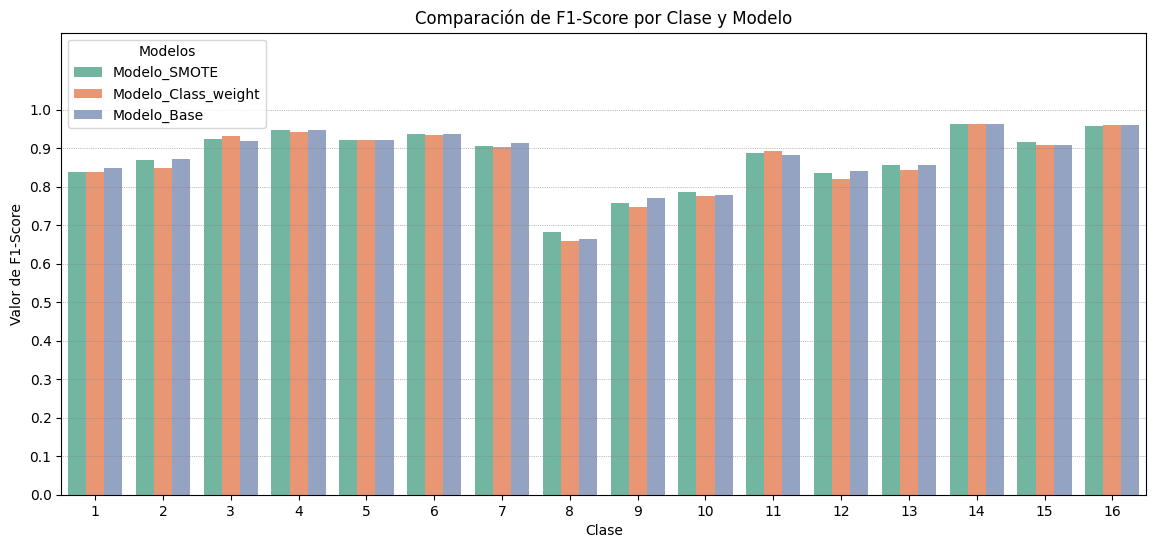

In [211]:
y_preds_testing = {
    "Modelo_SMOTE": y_pred_smote,
    "Modelo_Class_weight": y_pred_class_weight,
    "Modelo_Base": y_pred_base
}

# Obtener los reportes en formato de diccionario
reportes = {nombre: classification_report(y_test, y_pred, output_dict=True)
            for nombre, y_pred in y_preds_testing.items()}

# Extraer métricas para cada modelo y cada clase (1 al 16)
metricas = []
for modelo, reporte in reportes.items():
    for clase in map(str, range(1, 17)):  # Clases del 1 al 16
        if clase in reporte:  # Verificar si la clase está en el reporte
            metricas.append({
                "Modelo": modelo,
                "Clase": int(clase),  # Convertir a número para ordenarlo bien
                "Precision": reporte[clase]["precision"],
                "Recall": reporte[clase]["recall"],
                "F1-Score": reporte[clase]["f1-score"]
            })
        else:
            metricas.append({
                "Modelo": modelo,
                "Clase": int(clase),
                "Precision": 0,  # Si falta la clase, ponemos 0
                "Recall": 0,
                "F1-Score": 0
            })

# Convertir en DataFrame
df_metricas = pd.DataFrame(metricas)

# Graficar con Seaborn
metricas_a_graficar = ["Precision", "Recall", "F1-Score"]

for metrica in metricas_a_graficar:
    plt.figure(figsize=(14, 6))
    df_filtrado = df_metricas.melt(id_vars=["Modelo", "Clase"],
                                   value_vars=[metrica],
                                   var_name="Métrica", value_name="Valor")

    ax = sns.barplot(data=df_filtrado, x="Clase", y="Valor", hue="Modelo",
                     errorbar=None, palette="Set2")

    plt.title(f"Comparación de {metrica} por Clase y Modelo")
    plt.xlabel("Clase")
    plt.ylabel(f"Valor de {metrica}")
    plt.ylim(0, 1.2)  # Ajustar el límite superior para mayor separación
    plt.yticks([i/10 for i in range(0, 11)])  # Mostrar valores precisos en el eje Y

    # Agregar líneas pequeñas en el eje Y
    for y in [i/10 for i in range(0, 11)]:
        plt.axhline(y=y, color='gray', linestyle='dotted', linewidth=0.5)

    plt.legend(title="Modelos")
    plt.show()

In [162]:
direct_final_test = '../resources/micro_proyecto2_data/data_ods_prueba.xlsx'
df_test = pd.read_excel(direct_final_test)
print(df_test.shape)
df_test.head(5)


(100, 2)


,textos,ODS
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,No dejar clara la naturaleza de estos riesgos ...,6
2,"Como resultado, un mayor y mejorado acceso al ...",13
3,Con el Congreso firmemente en control de la ju...,16
4,"Luego, dos secciones finales analizan las impl...",5


In [163]:
X_predict = df_test["textos"].astype(str)
Y_real_tags = df_test["ODS"]
print(X_predict.shape)
print(Y_real_tags.shape)

(100,)
(100,)


In [164]:
predictions_smote = text_pipeline_smote.predict(X_predict)
predictions_class_weight = text_pipeline_class_weight.predict(X_predict)
predictions_base = text_pipeline_base.predict(X_predict)

In [212]:
print("Accuracy SMOTE: ", accuracy_score(Y_real_tags, predictions_smote))
print("Clasification Report SMOTE:\n", classification_report(Y_real_tags, predictions_smote))

Accuracy SMOTE:  0.9
Clasification Report SMOTE:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00        14
           5       1.00      0.92      0.96        12
           6       0.80      1.00      0.89         8
           7       0.83      0.83      0.83         6
           8       0.60      0.75      0.67         4
           9       0.50      1.00      0.67         1
          11       0.83      0.77      0.80        13
          13       0.83      0.62      0.71         8
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00        12

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.91      0

In [213]:
print("Accuracy Class weight : ", accuracy_score(Y_real_tags, predictions_class_weight))
print("Clasification Report Class Weight:\n", classification_report(Y_real_tags, predictions_class_weight))

Accuracy Class weight :  0.9
Clasification Report Class Weight:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00        14
           5       1.00      0.92      0.96        12
           6       0.80      1.00      0.89         8
           7       0.83      0.83      0.83         6
           8       0.60      0.75      0.67         4
           9       0.50      1.00      0.67         1
          11       0.83      0.77      0.80        13
          13       0.83      0.62      0.71         8
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00        12

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.88       100
weighted avg   

In [214]:
print("Accuracy Base: ", accuracy_score(Y_real_tags, predictions_base))
print("Clasification Report Base:\n", classification_report(Y_real_tags, predictions_base))

Accuracy Base:  0.9
Clasification Report Base:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00        14
           5       1.00      0.92      0.96        12
           6       0.80      1.00      0.89         8
           7       0.83      0.83      0.83         6
           8       0.60      0.75      0.67         4
           9       0.50      1.00      0.67         1
          11       0.83      0.77      0.80        13
          13       0.83      0.62      0.71         8
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00        12

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.91      0.9

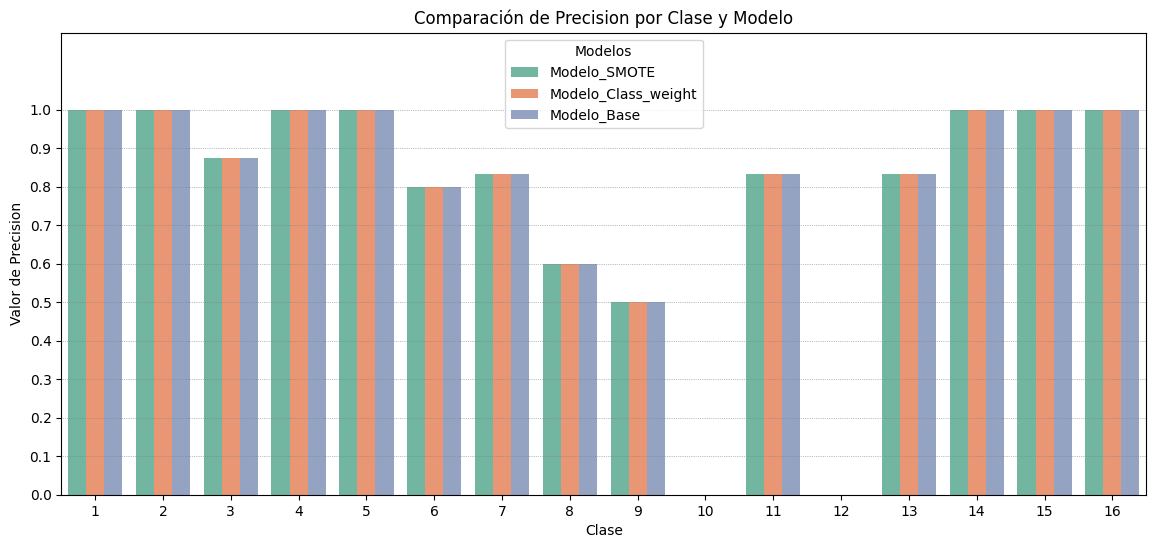

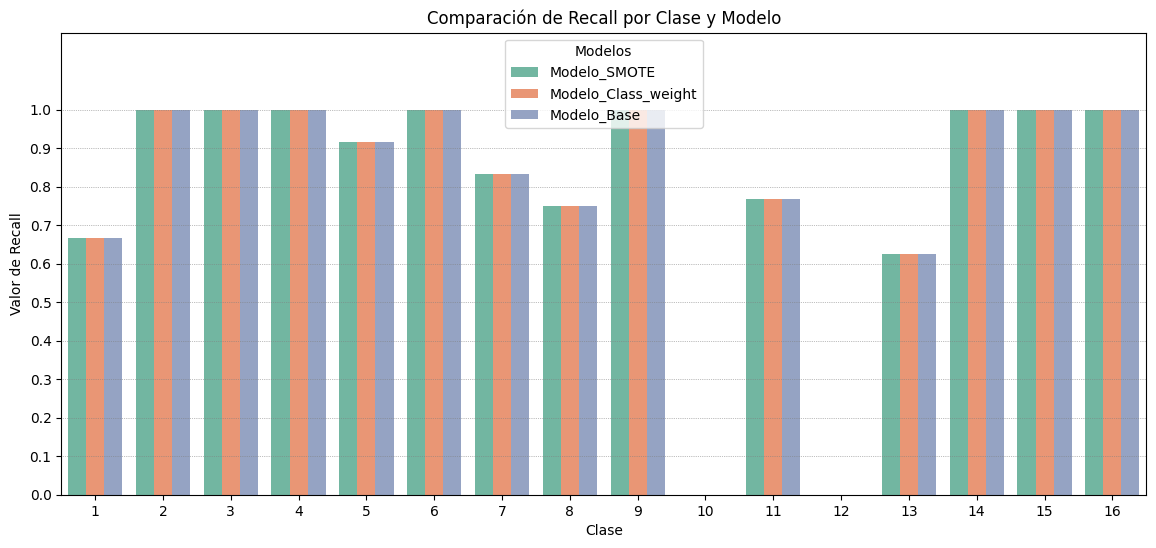

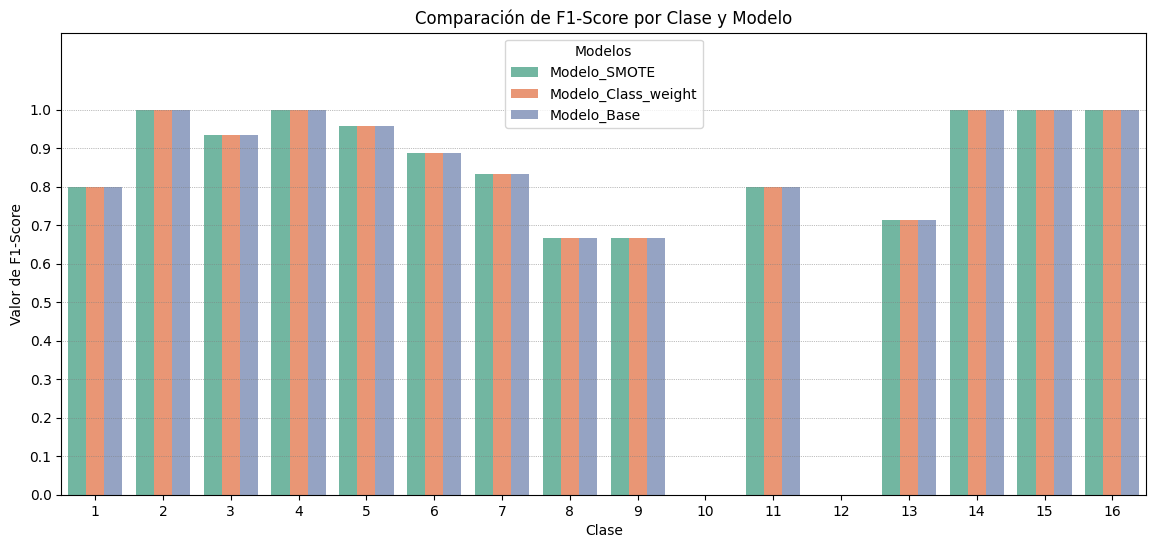

In [209]:
y_preds_finales = {
    "Modelo_SMOTE": predictions_smote,
    "Modelo_Class_weight": predictions_class_weight,
    "Modelo_Base": predictions_base
}

# Obtener los reportes en formato de diccionario
reportes = {nombre: classification_report(Y_real_tags, y_pred, output_dict=True)
            for nombre, y_pred in y_preds_finales.items()}

# Extraer métricas para cada modelo y cada clase (1 al 16)
metricas = []
for modelo, reporte in reportes.items():
    for clase in map(str, range(1, 17)):  # Clases del 1 al 16
        if clase in reporte:  # Verificar si la clase está en el reporte
            metricas.append({
                "Modelo": modelo,
                "Clase": int(clase),  # Convertir a número para ordenarlo bien
                "Precision": reporte[clase]["precision"],
                "Recall": reporte[clase]["recall"],
                "F1-Score": reporte[clase]["f1-score"]
            })
        else:
            metricas.append({
                "Modelo": modelo,
                "Clase": int(clase),
                "Precision": 0,  # Si falta la clase, ponemos 0
                "Recall": 0,
                "F1-Score": 0
            })

# Convertir en DataFrame
df_metricas = pd.DataFrame(metricas)

# Graficar con Seaborn
metricas_a_graficar = ["Precision", "Recall", "F1-Score"]

for metrica in metricas_a_graficar:
    plt.figure(figsize=(14, 6))
    df_filtrado = df_metricas.melt(id_vars=["Modelo", "Clase"],
                                   value_vars=[metrica],
                                   var_name="Métrica", value_name="Valor")

    ax = sns.barplot(data=df_filtrado, x="Clase", y="Valor", hue="Modelo",
                     errorbar=None, palette="Set2")

    plt.title(f"Comparación de {metrica} por Clase y Modelo")
    plt.xlabel("Clase")
    plt.ylabel(f"Valor de {metrica}")
    plt.ylim(0, 1.2)  # Ajustar el límite superior para mayor separación
    plt.yticks([i/10 for i in range(0, 11)])  # Mostrar valores precisos en el eje Y

    # Agregar líneas pequeñas en el eje Y
    for y in [i/10 for i in range(0, 11)]:
        plt.axhline(y=y, color='gray', linestyle='dotted', linewidth=0.5)

    plt.legend(title="Modelos")
    plt.show()